# Problem 2 a

the lowest RMSE from the validation set 24.8993371766
find the a is 0.231012970008


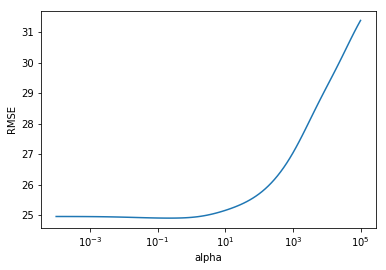

The test set RMSE is 25.7486918796


In [34]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn import preprocessing

%matplotlib inline

# read data into a DataFrame
dataTrain = pd.read_csv('blogData_train.csv',header=None,index_col=False) 
dataTest = pd.read_csv('blogData_test.csv',header=None,index_col=False)
dataValidate = pd.read_csv('blogData_validate.csv',header=None,index_col=False)

X = dataTrain[list(range(280))]
y = dataTrain[[280]]
X_val = dataValidate[list(range(280))]
y_val = dataValidate[[280]]
X_test = dataTest[list(range(280))]
y_test = dataTest[[280]]

#standardization
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)
X_val = min_max_scaler.transform(X_val)
X_test = min_max_scaler.transform(X_test)

#try more alpha
alphas = np.logspace(-4, 5, 100)
clf = linear_model.Ridge(fit_intercept=False)

i=0
RMSE=[]
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    y_pred = clf.predict(X_val)
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_pred,y_val)))
    i=i+1
    
print('the lowest RMSE from the validation set',min(RMSE))
a=alphas[RMSE.index(min(RMSE))]
print('find the a is',a)

#draw RMSE from the validation set
ax = plt.gca()
ax.plot(alphas, RMSE)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.axis('tight')
plt.show()

#use the a to compute RMSE_min
ridge = linear_model.Ridge(alpha=a)
clf = ridge.fit(X, y)
y_testpred = clf.predict(X_test)
RMSE_test=np.sqrt(metrics.mean_squared_error(y_testpred,y_test))
print('The test set RMSE is',RMSE_test)
B_parta=ridge.coef_
#print(B_parta)

In [35]:
print(B_parta)

[[ -9.27780128e+01   3.16346805e+01  -2.03226734e+01   5.22842931e+00
    2.56367470e+01   1.04264770e+02   3.49591124e+01  -1.17442044e+01
   -1.08632682e+01   6.64452884e+01   1.02231434e+02   7.72503045e+01
    0.00000000e+00  -2.15038901e+01   9.01785143e+01  -9.14712259e+01
   -6.76863628e+01  -2.03226734e+01   1.26711067e+01   3.02687417e+01
    4.39212405e+01  -4.30090561e+01  -1.81787559e+01  -5.86547449e+00
    6.84345684e+01  -6.03742644e+01   3.24562265e+00   9.82784799e+00
   -9.78162942e+00   4.99904496e+00   3.96744089e+01   8.26156628e-01
    0.00000000e+00   1.07746079e+01  -1.44493325e+00   4.35743184e+01
   -2.63100275e+01   0.00000000e+00   1.82678510e+01  -1.06517569e+00
   -2.90891342e+01   1.07867667e+01   9.82784799e+00   4.38786258e+00
   -4.34871270e-03  -7.74750014e+00   3.52652361e+00   1.40827377e+01
   -9.39245891e+00  -6.76758332e-04  -8.39199204e+01   2.40380236e+02
    7.39455019e+00  -6.05693439e+01   1.23887833e+02  -2.57181347e+01
    1.11759373e+01  

# Problem 2 b

In [31]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

%matplotlib inline

# read data into a DataFrame
dataTrain = pd.read_csv('blogData_train.csv',header=None,index_col=False) 
dataTest = pd.read_csv('blogData_test.csv',header=None,index_col=False)
dataValidate = pd.read_csv('blogData_validate.csv',header=None,index_col=False)

X = np.array(dataTrain[list(range(280))])
y = np.array(dataTrain[[280]])
X_val = np.array(dataValidate[list(range(280))])
y_val = np.array(dataValidate[[280]])
X_test = np.array(dataTest[list(range(280))])
y_test = np.array(dataTest[[280]])

#standardization

'''
I tried two ways to standardize, but finally used the preprocessing packet for better performance.
def fit_data(dataSet):
    i=0
    j=0
    X_fit = zeros(shape(dataSet))
    for j in range(len(dataSet[0])):
        m=np.average(dataSet[:,j])
        s=np.std(dataSet[:,j])
        for i in range(len(dataSet)):
            if (s!=0):
                X_fit[i,j]=(dataSet[i,j]-m)/s
    return X_fit

def fit_data(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)

    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    for j in range(len(dataSet[0])):
        for i in range(len(dataSet)):
            if ((maxVals[j] -minVals[j])!=0):
                normDataSet[i,j]=(dataSet[i,j]-minVals[j])/maxVals[j] -minVals[j]
    return normDataSet

X=fit_data(X)
X_val=fit_data(X_val)
X_test=fit_data(X_test)
'''
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)
X_val = min_max_scaler.transform(X_val)
X_test = min_max_scaler.transform(X_test)

X_all=np.vstack((X,X_val,X_test))
y_all=np.vstack((y,y_val,y_test))

# Ridge
def sgd_ridge(Xarray,yarray,alfas,learning_rate,times):
    i=0
    B=np.zeros((280,1))

    for i in range(times):
        random.shuffle(Xarray)
        j=0
        for j in range(len(Xarray)):
            deltaB = 2*np.dot((Xarray[[j]]).T,(np.dot(Xarray[[j]],B)-yarray[j]))+2*alfas*B
            B = B - alfas*learning_rate*deltaB
            
    return B

#RMSE
def RMSE_com(Xarray,yarray,B):
    line=0
    for i in range(len(yarray)):
        line = line+(np.dot(Xarray[[i]],B)-yarray[i])**2

    RMSE = sqrt(line/len(yarray))
    
    return RMSE

B0=sgd_ridge(X,y,0.231,0.01,5) #choose learning rate 0.01


# Problem 2 c

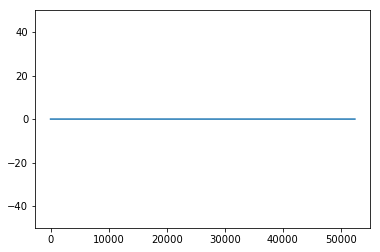

RMSE is [[ 28.82748016]] learning_rate is: 1e-10


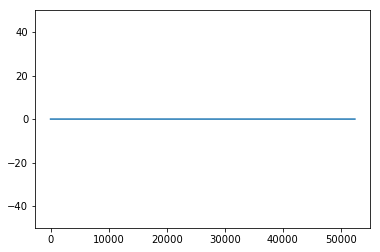

RMSE is [[ 28.82745552]] learning_rate is: 3.35981828628e-10


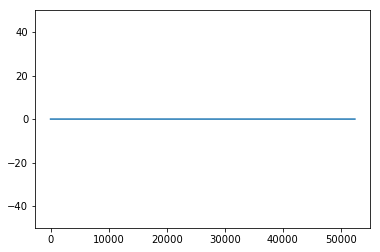

RMSE is [[ 28.82737296]] learning_rate is: 1.12883789168e-09


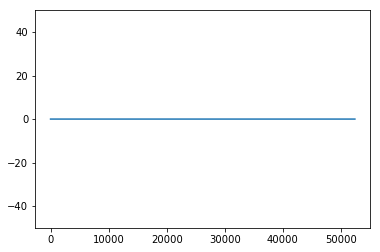

RMSE is [[ 28.82709546]] learning_rate is: 3.79269019073e-09


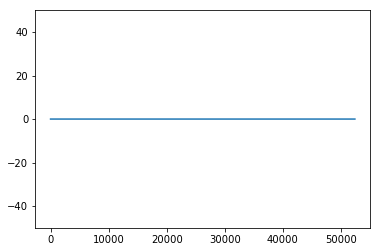

RMSE is [[ 28.82616346]] learning_rate is: 1.2742749857e-08


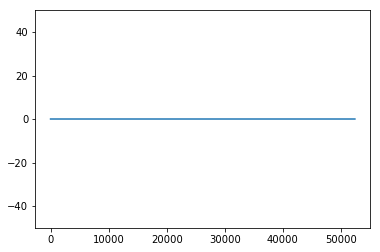

RMSE is [[ 28.82305437]] learning_rate is: 4.28133239872e-08


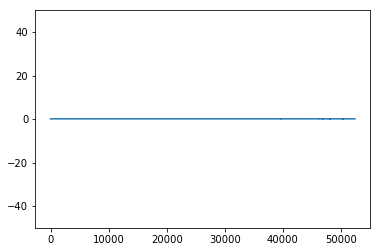

RMSE is [[ 28.81279212]] learning_rate is: 1.43844988829e-07


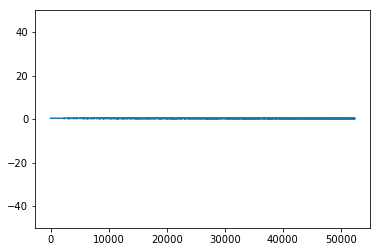

RMSE is [[ 28.78012619]] learning_rate is: 4.83293023857e-07


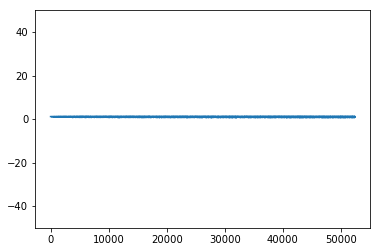

RMSE is [[ 28.68845887]] learning_rate is: 1.62377673919e-06


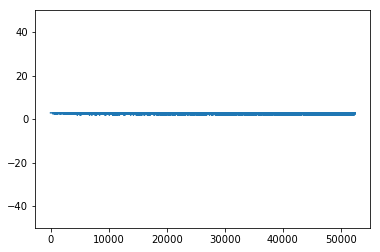

RMSE is [[ 28.51630289]] learning_rate is: 5.45559478117e-06


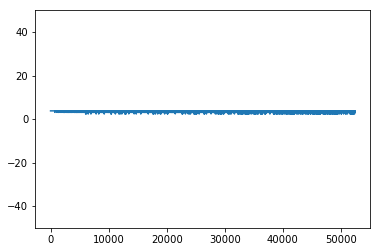

RMSE is [[ 28.44207521]] learning_rate is: 1.83298071083e-05


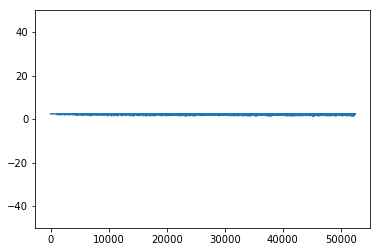

RMSE is [[ 28.56191913]] learning_rate is: 6.15848211066e-05


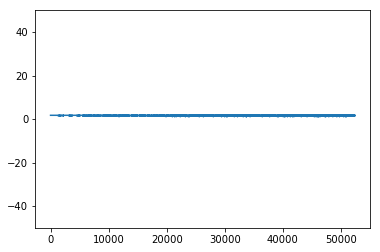

RMSE is [[ 28.63246116]] learning_rate is: 0.000206913808111


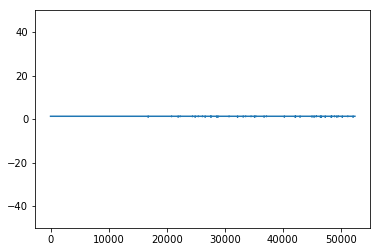

RMSE is [[ 28.66421599]] learning_rate is: 0.000695192796178


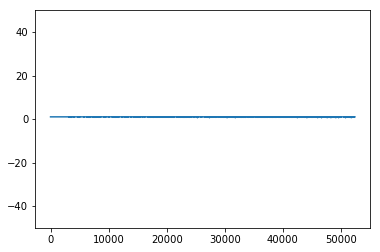

RMSE is [[ 28.70990394]] learning_rate is: 0.00233572146909


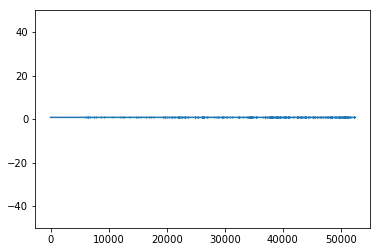

RMSE is [[ 28.73899289]] learning_rate is: 0.00784759970351


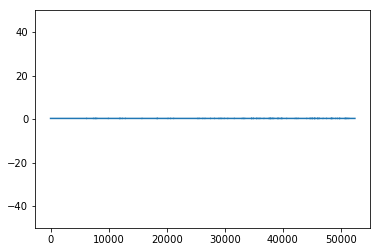

RMSE is [[ 28.7908616]] learning_rate is: 0.0263665089873


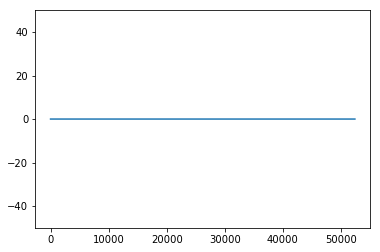

RMSE is [[ 28.82587043]] learning_rate is: 0.088586679041


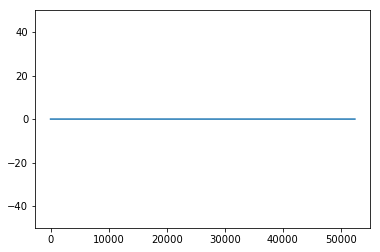

RMSE is [[ 28.8274915]] learning_rate is: 0.297635144163


C:\Users\Si\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in multiply
C:\Users\Si\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in subtract


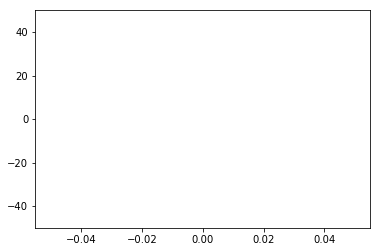

RMSE is [[ nan]] learning_rate is: 1.0


In [25]:
#first use the train set to find the near range of the learning rate
learning_rate=np.logspace(-10, 0, 20)
i=0

for a in learning_rate:
    B1 = sgd_ridge(X,y,0.231,a,1)
    F_xtemp=np.dot(X,B1)
    
    plt.plot(F_xtemp)
    plt.ylim(-50,50)
    plt.show()
    RMSE=RMSE_com(X_test,y_test,B1)
    print('RMSE is',RMSE,'learning_rate is:',a)
    
    


When using the train data one time of sgd,it seems that when a is  1.83298071083e-05,RMSE is the smallest [[ 28.44207521]].So we change the range of learning rate range smaller, and try the whole data set 8times by ridge.

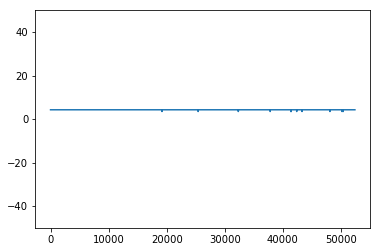

RMSE is [[ 28.40492794]] learning_rate is: 1e-06


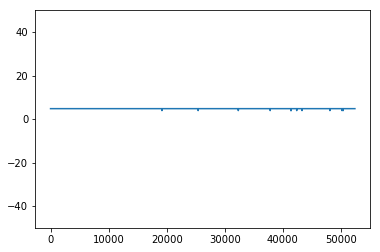

RMSE is [[ 28.36829912]] learning_rate is: 1.29154966501e-06


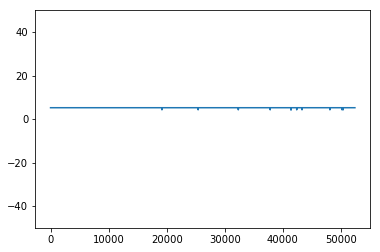

RMSE is [[ 28.34023974]] learning_rate is: 1.6681005372e-06


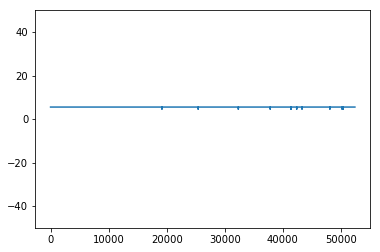

RMSE is [[ 28.3216903]] learning_rate is: 2.15443469003e-06


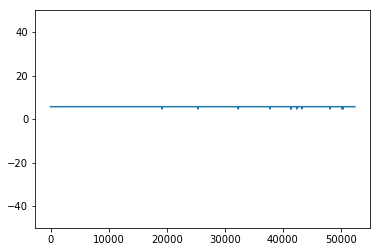

RMSE is [[ 28.31230938]] learning_rate is: 2.78255940221e-06


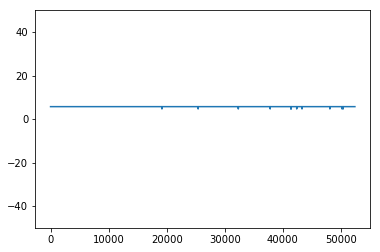

RMSE is [[ 28.31075476]] learning_rate is: 3.5938136638e-06


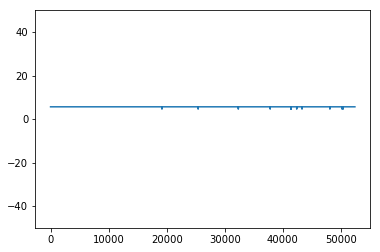

RMSE is [[ 28.31520245]] learning_rate is: 4.64158883361e-06


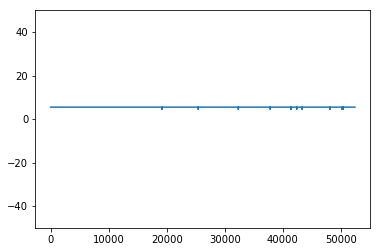

RMSE is [[ 28.32400539]] learning_rate is: 5.99484250319e-06


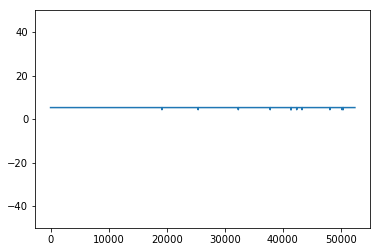

RMSE is [[ 28.33619922]] learning_rate is: 7.74263682681e-06


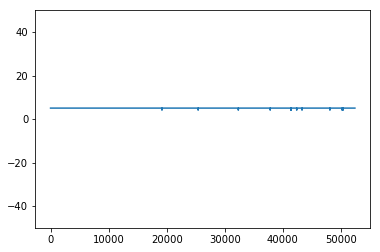

RMSE is [[ 28.35144694]] learning_rate is: 1e-05


In [30]:
learning_rate=np.logspace(-6, -5, 10)
i=0

for a in learning_rate:
    B1 = sgd_ridge(X_all,y_all,0.231,a,8)
    F_xtemp=np.dot(X,B1)
    
    plt.plot(F_xtemp)
    plt.ylim(-50,50)
    plt.show()
    RMSE=RMSE_com(X_test,y_test,B1)
    print('RMSE is',RMSE,'learning_rate is:',a)

So the good learning_rate is: 3.5938136638e-06.
when train on the entire dataset by that learning rate, the smallest RMSE is 28.31075476.

# problem 2 d

I compared the two learned coefficients between a and c, they are totally different. I print the coefficients of a in part a.

In [36]:

B_partc=sgd_ridge(X_all,y_all,0.231,0.000004,8)

print('the learned coefficients fromp part c is:\n',B_partc)

the learned coefficients fromp part c is:
 [[  2.73377936e-02]
 [  7.68441374e-02]
 [  2.53098346e-03]
 [  1.58981955e-01]
 [  1.18227374e-02]
 [  2.60202128e-02]
 [  7.16950736e-02]
 [  2.89623327e-03]
 [  1.87309979e-01]
 [  5.18336177e-03]
 [  2.50954687e-02]
 [  7.08179775e-02]
 [  0.00000000e+00]
 [  1.86867344e-01]
 [  4.28295217e-03]
 [  2.56074833e-02]
 [  6.75926976e-02]
 [  2.53098346e-03]
 [  1.45815637e-01]
 [  1.10839761e-02]
 [  4.54185227e-02]
 [  6.66492639e-02]
 [  1.14714176e+00]
 [  1.82808094e-01]
 [  5.63115538e-01]
 [  4.91389906e-02]
 [  1.71540191e-01]
 [ -5.68748219e-05]
 [  2.45962857e-01]
 [  1.11768947e-02]
 [  5.27704731e-02]
 [  1.11153485e-01]
 [  0.00000000e+00]
 [  2.47634569e-01]
 [ -4.47653433e-03]
 [  5.22863950e-02]
 [  1.09142457e-01]
 [  0.00000000e+00]
 [  2.46789888e-01]
 [ -4.55192882e-06]
 [  4.69527403e-02]
 [  1.66590798e-01]
 [ -5.68748219e-05]
 [  2.56752971e-01]
 [  5.25711521e-03]
 [  1.16830794e-01]
 [  9.35883248e-02]
 [  1.08656139e+0